## Question and why we think is important

#### Relative background infomation

#### Dataset introduction

some description for dataset 1

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ks_2samp
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


##### Dataset 2
some description for dataset 2

In [76]:
AI_Job_Threat_Index = pd.read_csv('My_Data.csv')
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


# Data cleaning and exploration
### Dataset 1: AI Powered Job Market

In [37]:
print("\nSummary statistics:")
print(AI_Powered_Job_Market.describe())


Summary statistics:
          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


In [38]:
for col in AI_Powered_Job_Market.select_dtypes(include=['object']).columns:
    AI_Powered_Job_Market[col] = AI_Powered_Job_Market[col].astype('category')
AI_Powered_Job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Job_Title              500 non-null    category
 1   Industry               500 non-null    category
 2   Company_Size           500 non-null    category
 3   Location               500 non-null    category
 4   AI_Adoption_Level      500 non-null    category
 5   Automation_Risk        500 non-null    category
 6   Required_Skills        500 non-null    category
 7   Salary_USD             500 non-null    float64 
 8   Remote_Friendly        500 non-null    category
 9   Job_Growth_Projection  500 non-null    category
dtypes: category(9), float64(1)
memory usage: 10.5 KB


##### AI Adoption Levels Across Industries

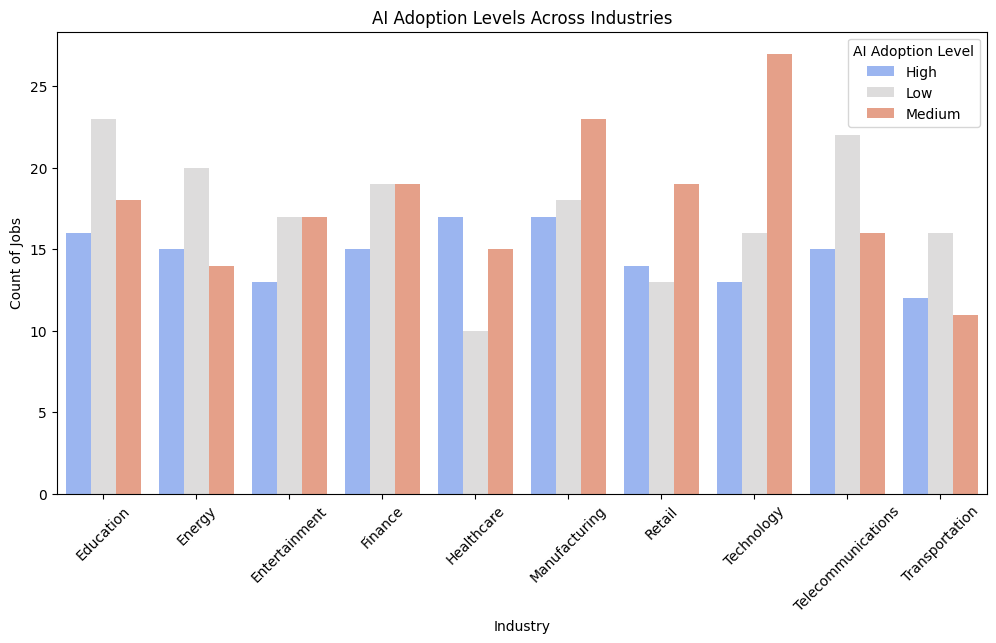

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("AI Adoption Levels Across Industries")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

##### Salary Distribution by AI Adoption Level

C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\1857548128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", y="Salary_USD", palette="coolwarm")


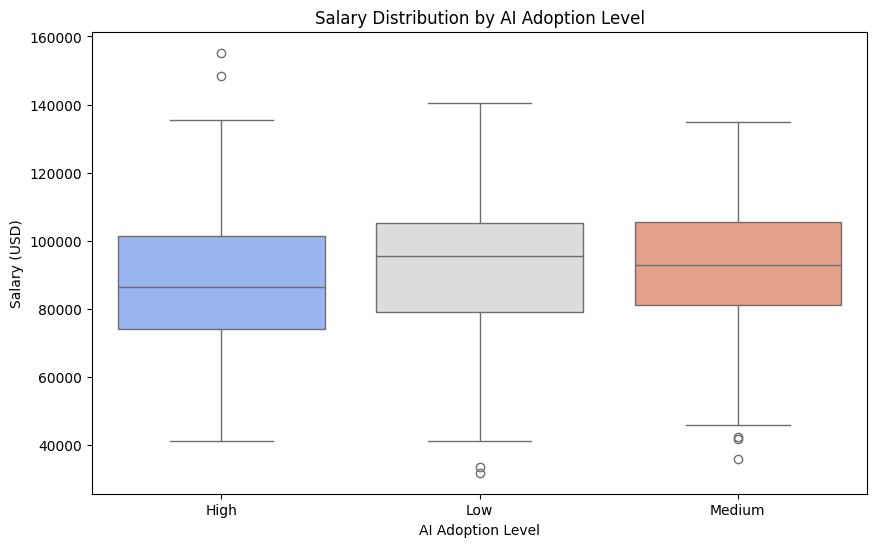

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", y="Salary_USD", palette="coolwarm")
plt.title("Salary Distribution by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Salary (USD)")
plt.show()

##### Salary Comparison by Automation Risk Level

C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\612735509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_Powered_Job_Market, x="Automation_Risk", y="Salary_USD", palette="coolwarm")


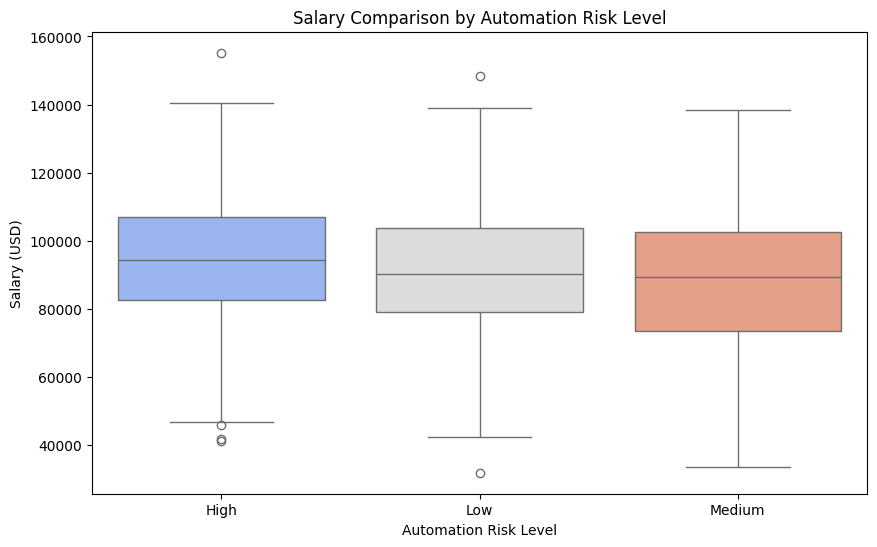

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="Automation_Risk", y="Salary_USD", palette="coolwarm")
plt.title("Salary Comparison by Automation Risk Level")
plt.xlabel("Automation Risk Level")
plt.ylabel("Salary (USD)")
plt.show()

##### Averge salary of each job

C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\633990137.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary = AI_Powered_Job_Market.groupby('Job_Title')['Salary_USD'].mean().sort_values()


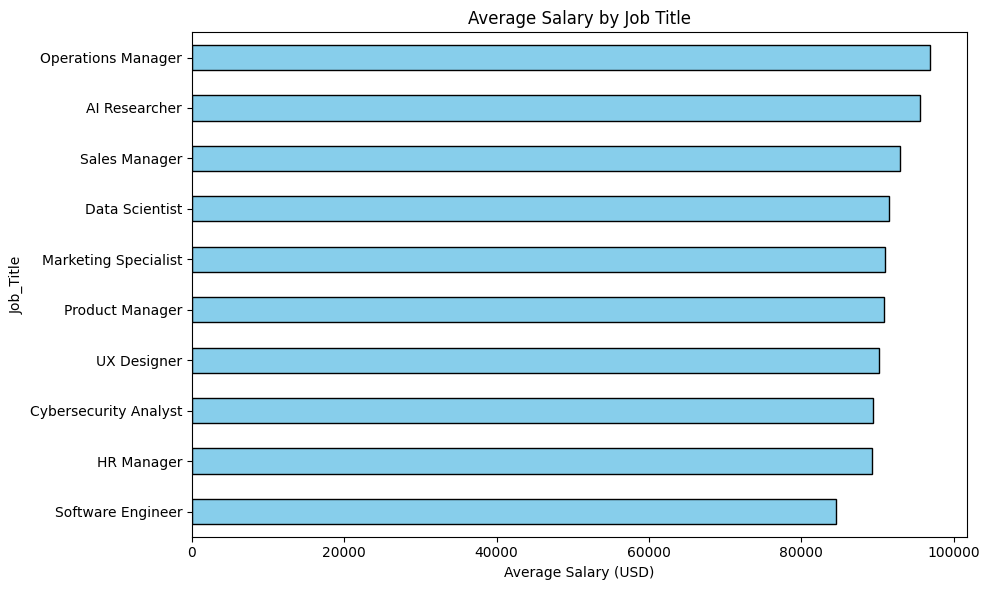

In [42]:
mean_salary = AI_Powered_Job_Market.groupby('Job_Title')['Salary_USD'].mean().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
mean_salary.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Salary (USD)')
plt.title('Average Salary by Job Title')
plt.tight_layout()
plt.show()

##### Job Growth Projection Across Industries

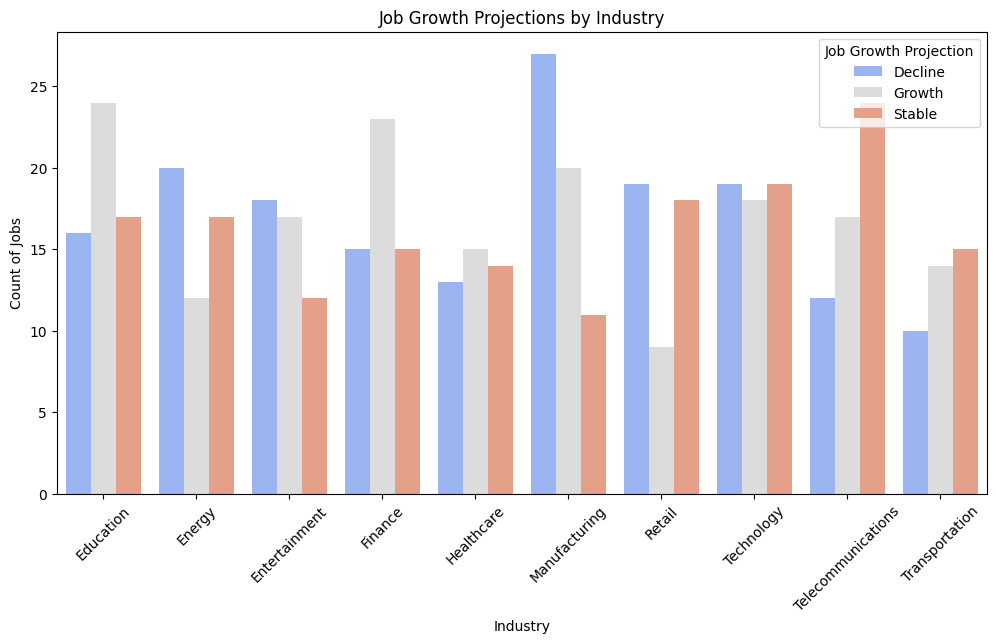

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("Job Growth Projections by Industry")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()

##### Relationship Between AI Adoption and Job Growth Projection

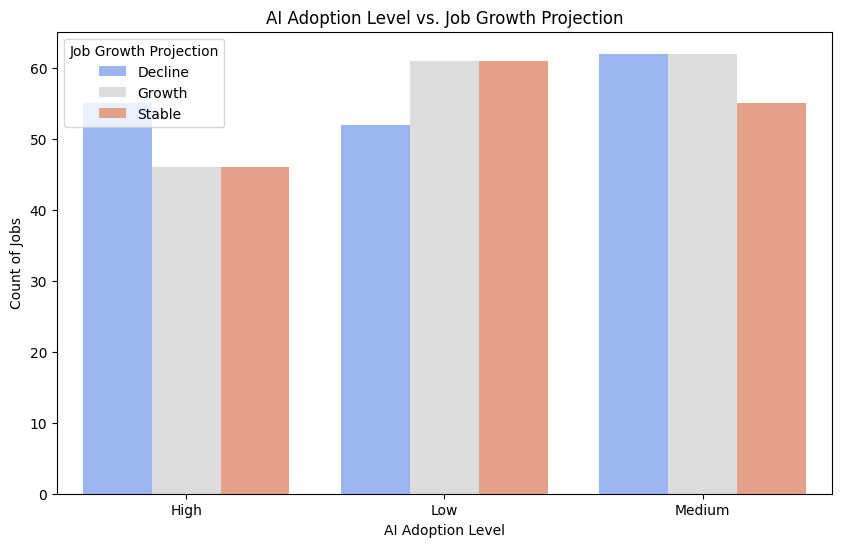

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("AI Adoption Level vs. Job Growth Projection")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()


##### Distribution of Remote-Friendly Jobs

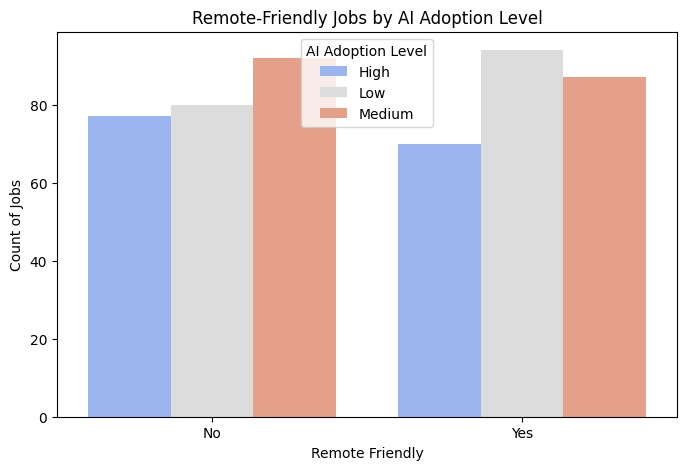

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=AI_Powered_Job_Market, x="Remote_Friendly", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("Remote-Friendly Jobs by AI Adoption Level")
plt.xlabel("Remote Friendly")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

##### Most In-Demand Skills by AI Adoption Level

C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\1961347661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette="coolwarm")


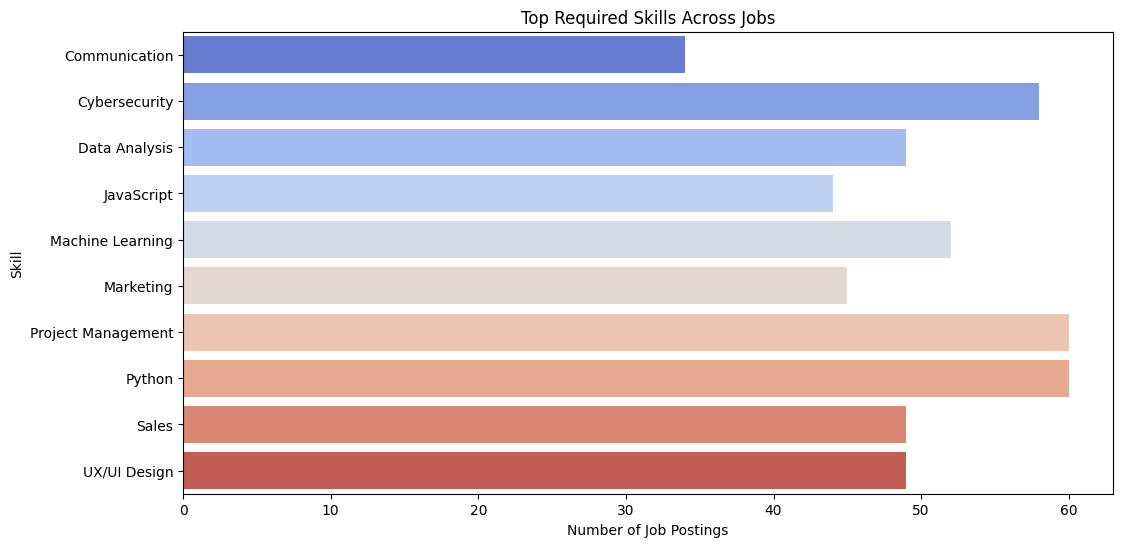

In [46]:
top_skills = AI_Powered_Job_Market["Required_Skills"].value_counts().nlargest(15)  # Get top 15 skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="coolwarm")
plt.title("Top Required Skills Across Jobs")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()

##### Average Salary by Industry and AI Adoption Level

C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\3523973315.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  salary_pivot = AI_Powered_Job_Market.pivot_table(values="Salary_USD", index="Industry", columns="AI_Adoption_Level", aggfunc="mean")


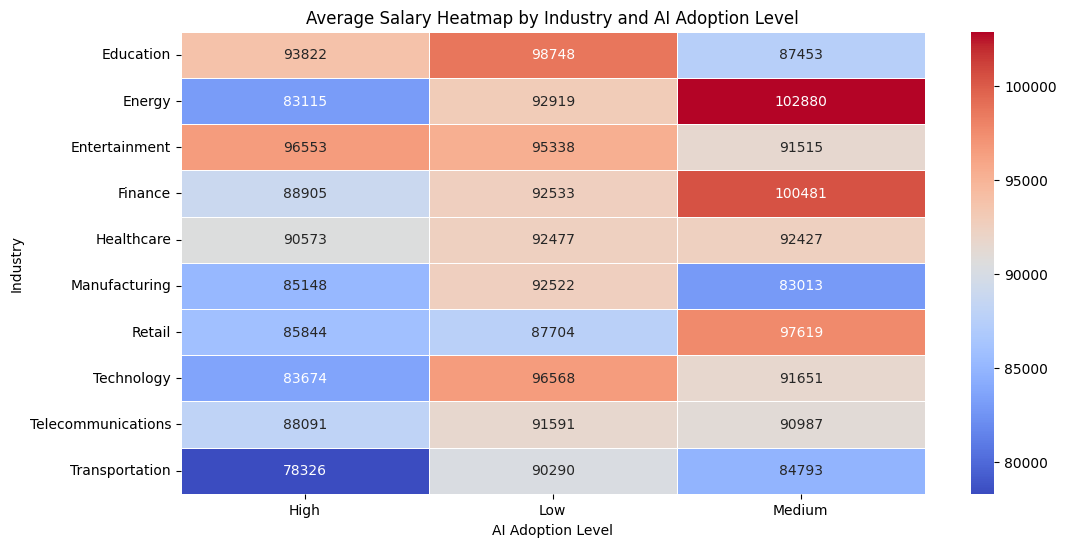

In [47]:
salary_pivot = AI_Powered_Job_Market.pivot_table(values="Salary_USD", index="Industry", columns="AI_Adoption_Level", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Salary Heatmap by Industry and AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Industry")
plt.show()


In [48]:
decline_counts = AI_Powered_Job_Market[AI_Powered_Job_Market['Job_Growth_Projection'] == 'Decline'].groupby('Job_Title')['Job_Growth_Projection'].count()

total_counts = AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].count()

decline_fraction = decline_counts / total_counts

decline_fraction 

C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\4099007374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decline_counts = AI_Powered_Job_Market[AI_Powered_Job_Market['Job_Growth_Projection'] == 'Decline'].groupby('Job_Title')['Job_Growth_Projection'].count()
C:\Users\jessi\AppData\Local\Temp\ipykernel_30284\4099007374.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].count()


Job_Title
AI Researcher            0.313725
Cybersecurity Analyst    0.345455
Data Scientist           0.370968
HR Manager               0.385965
Marketing Specialist     0.479167
Operations Manager       0.159091
Product Manager          0.256410
Sales Manager            0.326531
Software Engineer        0.292683
UX Designer              0.388889
Name: Job_Growth_Projection, dtype: float64

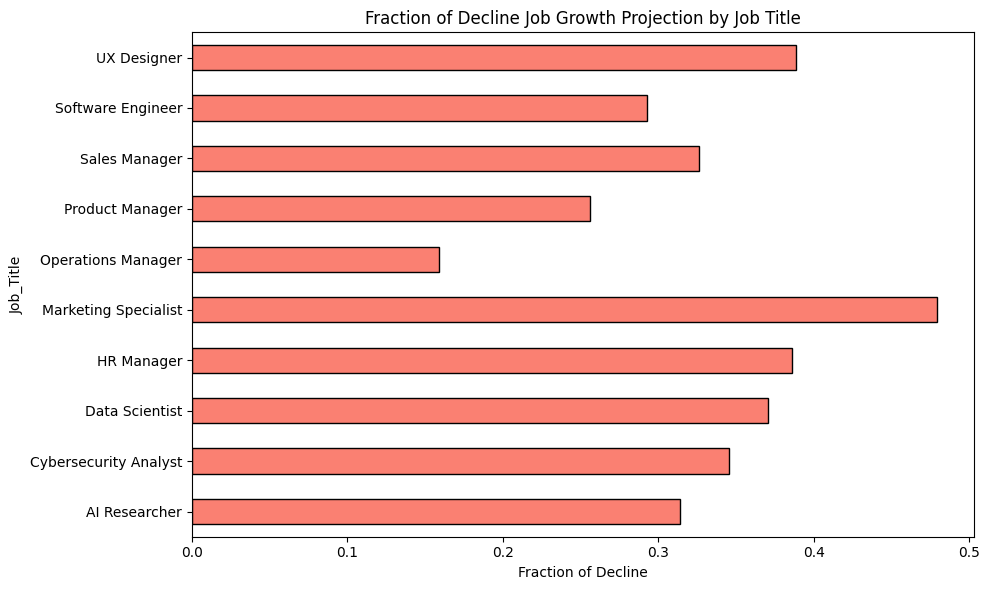

In [49]:
plt.figure(figsize=(10, 6))
decline_fraction.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Fraction of Decline')
plt.title('Fraction of Decline Job Growth Projection by Job Title')
plt.tight_layout()
plt.show()

##### Find the most relevent column

In [50]:
import itertools
col = AI_Powered_Job_Market.columns.drop('Salary_USD')
formulas = []
for r in range(len(col) + 1):
    for combo in itertools.combinations(col, r):
        # For the empty subset, use a null model indicator (using 1 as a placeholder)
        if not combo:
            formula = "Salary_USD ~ 1"
        else:
            formula = "Salary_USD ~ " + " + ".join(combo)
        formulas.append(formula)
formulas[-10:]

['Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Automation_Risk + Required_Skills + Remote_Friendly',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Automation_Risk + Required_Skills + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Automation_Risk + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Required_Skills + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + Automation_Risk + Required_Skills + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + AI_Adoption_Level + Automation_Risk + Required_Skills + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Location + AI_Adoption_Level + Automation_Risk + Required_Skills + Remote_Friendly + Job_Growth_Pro

In [51]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(AI_Powered_Job_Market, criterion, "Salary_USD")
backward_vars

Criterion: 11524.209260937474
Criterion: 11478.887800216358
Criterion: 11434.692787946831
Criterion: 11391.343613045012
Criterion: 11379.85814913987
Criterion: 11368.826662723724
Criterion: 11362.684809920465
Criterion: 11356.83501072544
Criterion: 11352.541622379904


set()

### Dataset 2

In [77]:
print("\nSummary statistics:")
print(AI_Job_Threat_Index.describe())


Summary statistics:
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf


C:\Users\jessi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


##### Check for missing values

In [78]:
print("\nMissing values in each column:")
print(AI_Job_Threat_Index.isnull().sum())


Missing values in each column:
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


##### Change AI Impack to float instead of string

In [79]:
AI_Job_Threat_Index['AI Impact'] = AI_Job_Threat_Index['AI Impact'].str.rstrip('%').astype(float)/ 100
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


In [80]:
for col in AI_Job_Threat_Index.select_dtypes(include=['object']).columns:
    AI_Job_Threat_Index[col] = AI_Job_Threat_Index[col].astype('category')
AI_Job_Threat_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job titiles        4706 non-null   category
 1   AI Impact          4706 non-null   float64 
 2   Tasks              4706 non-null   int64   
 3   AI models          4706 non-null   int64   
 4   AI_Workload_Ratio  4706 non-null   float64 
 5   Domain             4706 non-null   category
dtypes: category(2), float64(2), int64(2)
memory usage: 327.2 KB


##### plot box plot for each quantity column to see if there are some outliners

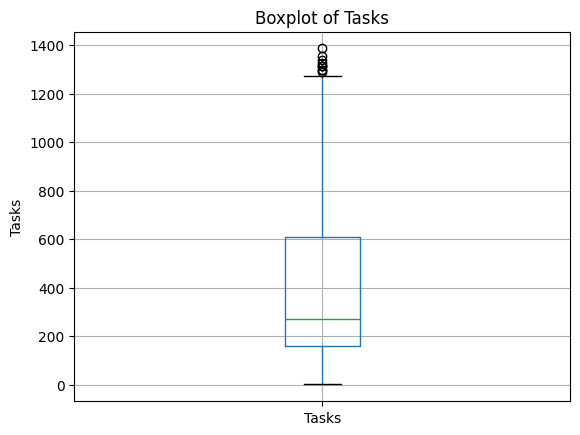

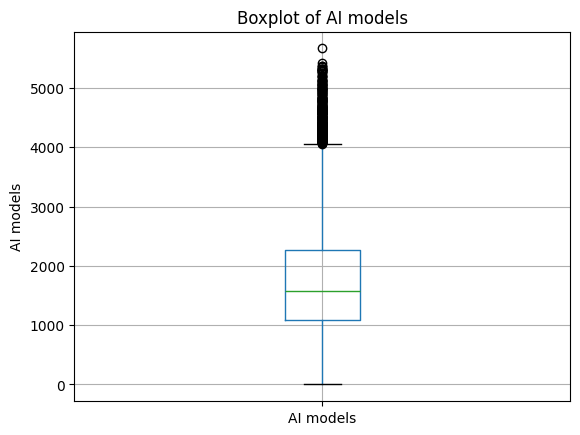

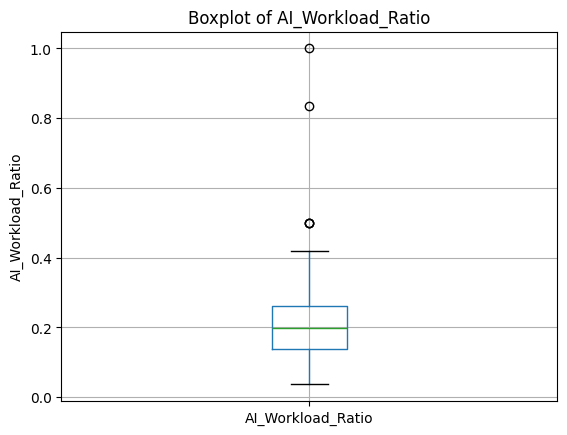

In [81]:
quant_features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
for col in quant_features:
    plt.figure()
    AI_Job_Threat_Index.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [82]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [83]:
filtered_df = AI_Job_Threat_Index.copy()
for col in quant_features:
    filtered_df = remove_outliers(filtered_df, col)

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df.head()

,Job_titiles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


##### Scatter plot: Tasks vs. AI Workload Ratio

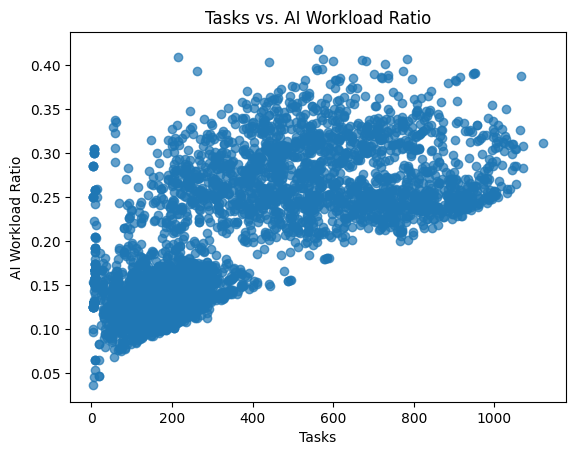

In [84]:
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Tasks vs. AI Workload Ratio")
plt.xlabel("Tasks")
plt.ylabel("AI Workload Ratio")
plt.show()

##### Scatter plot for AI Impact vs. AI_Workload_Ratio

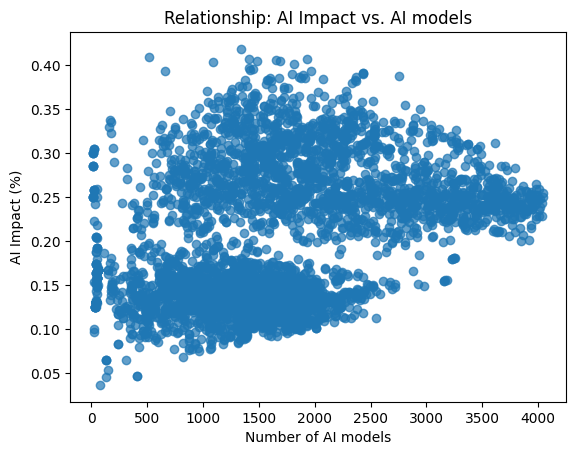

Correlation between AI Impact and AI models: 0.36667870771290856


In [85]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

##### Scatter plot for AI Impact vs. AI models

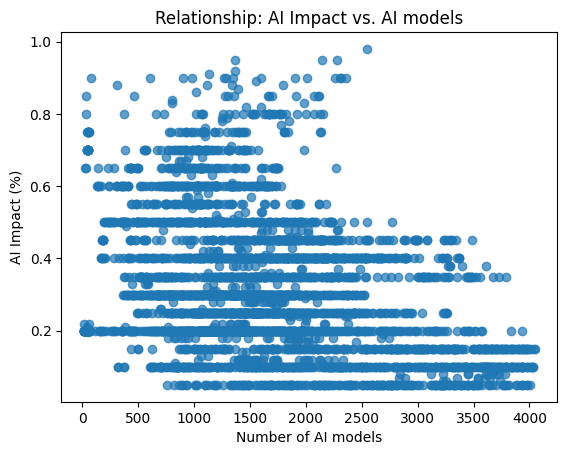

Correlation between AI Impact and AI models: -0.35089333753136176


In [86]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

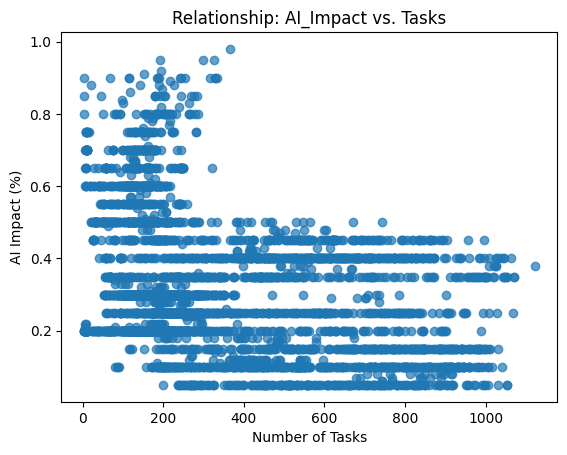

Correlation between AI Impact and Tasks: -0.3583205375514259


In [87]:
from scipy.stats import pearsonr
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI_Impact vs. Tasks")
plt.xlabel("Number of Tasks")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(filtered_df['Tasks'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and Tasks:", corr_coef)

In [91]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(filtered_df[['Tasks', 'AI_models', 'AI_Workload_Ratio', "AI_Impact"]], criterion, "AI_Impact")
backward_vars

{'AI_Workload_Ratio', 'AI_models', 'Tasks'}

In [92]:
covariate = ' + '.join(backward_vars)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     279.0
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          7.35e-166
Time:                        00:15:11   Log-Likelihood:                 1652.0
No. Observations:                4420   AIC:                            -3296.
Df Residuals:                    4416   BIC:                            -3270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6260      0.01

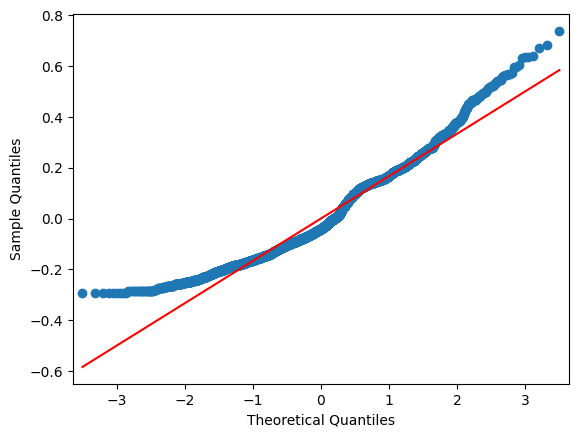

In [93]:
sm.qqplot(model.resid, line ='s');

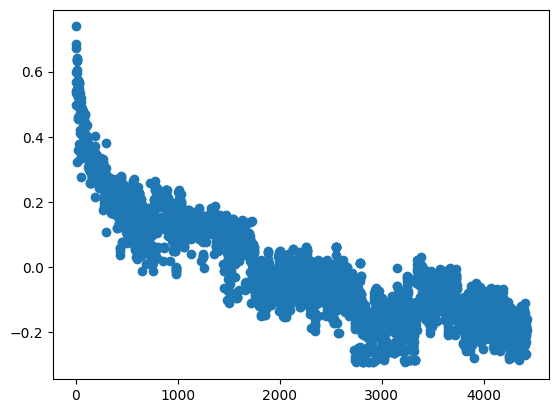

In [94]:
r = model.resid
plt.scatter(range(len(r)), r);

In [95]:
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: AI_models:  17.423
VIF: AI_Workload_Ratio:  7.181
VIF: Tasks:  30.554


In [96]:
df_vif = filtered_df[['AI_models', 'AI_Workload_Ratio']]
covariate = ' + '.join(df_vif)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     382.6
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          5.74e-154
Time:                        00:15:44   Log-Likelihood:                 1621.4
No. Observations:                4420   AIC:                            -3237.
Df Residuals:                    4417   BIC:                            -3218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4953      0.00

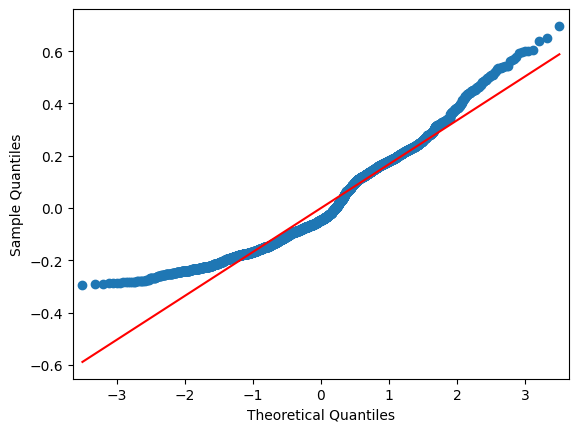

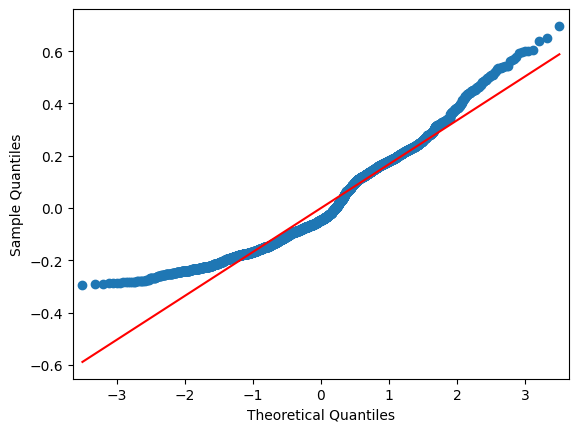

In [97]:
sm.qqplot(model.resid, line ='s')

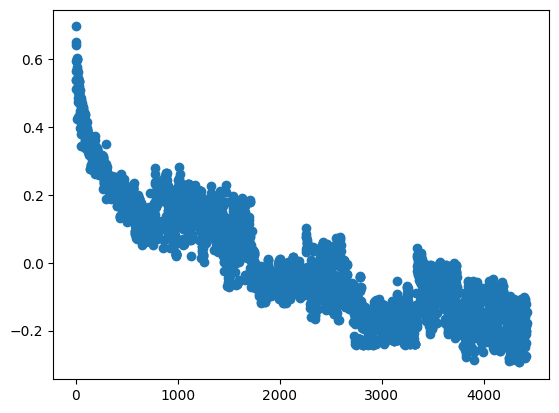

In [98]:
r = model.resid
plt.scatter(range(len(r)), r);

In [99]:
df_vif = filtered_df[['AI_Workload_Ratio']]
covariate = ' + '.join(df_vif)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     359.7
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           3.53e-77
Time:                        00:16:22   Log-Likelihood:                 1441.3
No. Observations:                4420   AIC:                            -2879.
Df Residuals:                    4418   BIC:                            -2866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4460      0.00

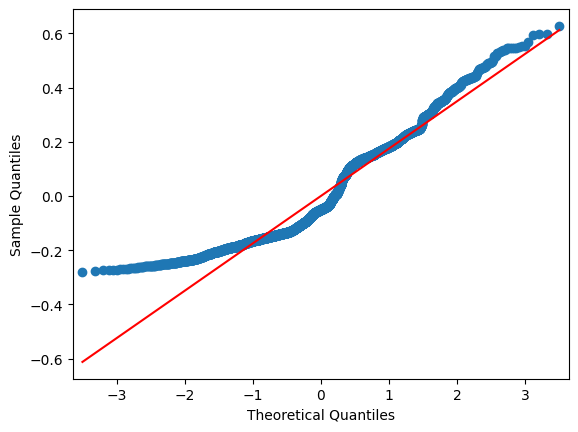

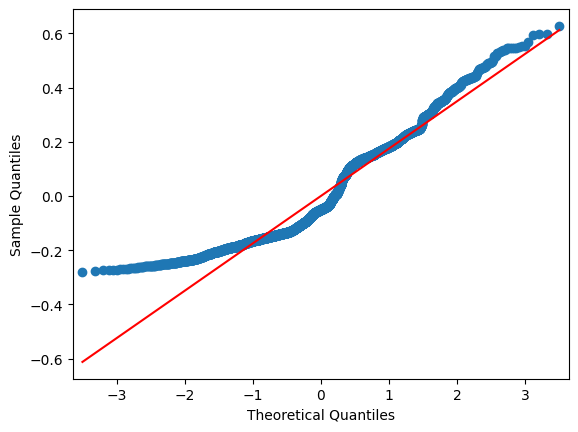

In [100]:
sm.qqplot(model.resid, line ='s')

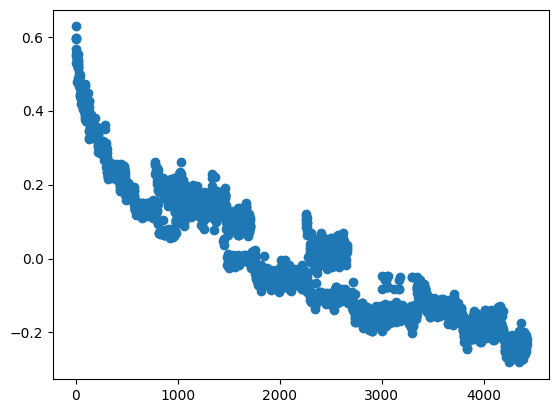

In [101]:
r = model.resid
plt.scatter(range(len(r)), r);

## Hypothesis Testing (AI Powered Job Market)
#### Encode Categories

In [102]:
AI_Powered_Job_Market["AI_Adoption_Level"] = pd.Categorical(AI_Powered_Job_Market["AI_Adoption_Level"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Automation_Risk"] = pd.Categorical(AI_Powered_Job_Market["Automation_Risk"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Job_Growth_Projection"] = pd.Categorical(AI_Powered_Job_Market["Job_Growth_Projection"], categories=["Decline", "Stable", "Growth"], ordered=True)

#### T-Test (AI Job Salary vs. Non-AI Job Salary) --> Two-Tailed Test

We are testing whether there is a statistically significant difference in salaries between jobs with high AI adoption and jobs with low AI adoption.

Null: The mean salary of high AI adoption jobs is equal to the mean salary of low AI adoption jobs

ALternate: The mean salary of high AI adoption jobs is different from the mean salary of low AI adoption jobs.

In [103]:
ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Salary_USD"]
non_ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Salary_USD"]

t_stat, p_value = stats.ttest_ind(ai_jobs, non_ai_jobs, nan_policy='omit')

print("T-Test: Salary in AI vs. Non-AI Jobs")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Test: Salary in AI vs. Non-AI Jobs
T-Statistic: -2.4602, P-Value: 0.0144


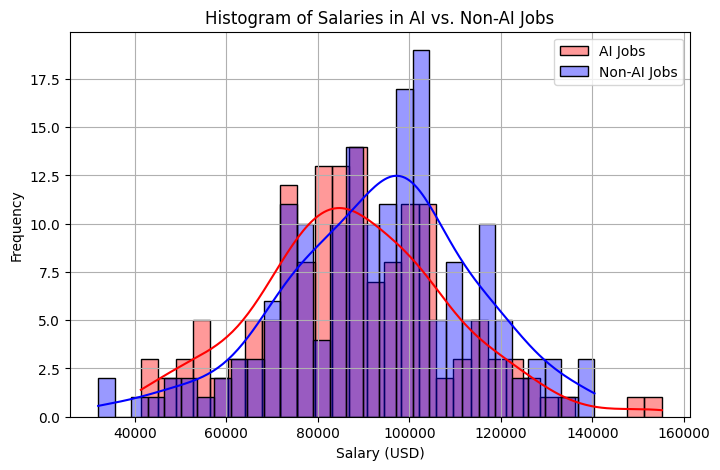

In [104]:
plt.figure(figsize=(8, 5))
sns.histplot(ai_jobs, bins=30, kde=True, label="AI Jobs", alpha=0.4, color='red')
sns.histplot(non_ai_jobs, bins=30, kde=True, label="Non-AI Jobs", alpha=0.4, color='blue')
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries in AI vs. Non-AI Jobs")
plt.legend()
plt.grid(True)
plt.show()


#### Chi-Squared Test: AI Adoption vs. Job Growth Projection

We are testing whether there is a significant association between AI adoption levels and job growth projections.

Null: There is no association between AI adoption level and job growth projection (job growth projection is independent of AI adoption)

Alternate: There is a significant association between AI adoption level and job growth projection (AI adoption may influence job growth projections)

In [105]:
contingency_table = pd.crosstab(AI_Powered_Job_Market["AI_Adoption_Level"], AI_Powered_Job_Market["Job_Growth_Projection"])

In [106]:
contingency_table

Job_Growth_Projection,Decline,Stable,Growth
AI_Adoption_Level,,,
Low,52,61,61
Medium,62,55,62
High,55,46,46


In [107]:
chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test: AI Adoption vs. Job Growth Projection")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {chi2_p_value:.4f}")

Chi-Square Test: AI Adoption vs. Job Growth Projection
Chi-Square Statistic: 2.3761, P-Value: 0.6670


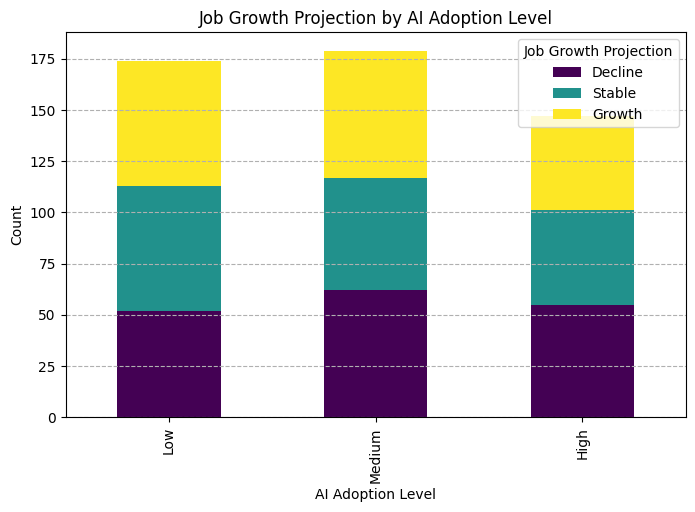

In [108]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Job Growth Projection by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.legend(title="Job Growth Projection")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Mann-Whitney U test

We are testing whether the distribution of job postings across industries differs significantly ebtween AI-heavy vs traditional / low AI-adoption industries.

Null: The distribution of job postings across industries is the same between AI-heavy and traditional industries (AI adoption does not significantly affect the distribution of job postings across industries)

Alternate: The distribution of job postings across industries differs between AI-heavy and traditional industries (some industries might have significantly more AI-heavy job postings compared to traditional jobs)

In [109]:
ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Industry"].value_counts()
non_ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Industry"].value_counts()

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

mwu_stat, mwu_p_value = stats.mannwhitneyu(ai_industries, non_ai_industries, alternative="two-sided")

print("Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries")
print(f"Test/U-Statistic: {mwu_stat:.4f}, P-Value: {mwu_p_value:.4f}")


Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries
Test/U-Statistic: 24.0000, P-Value: 0.0525


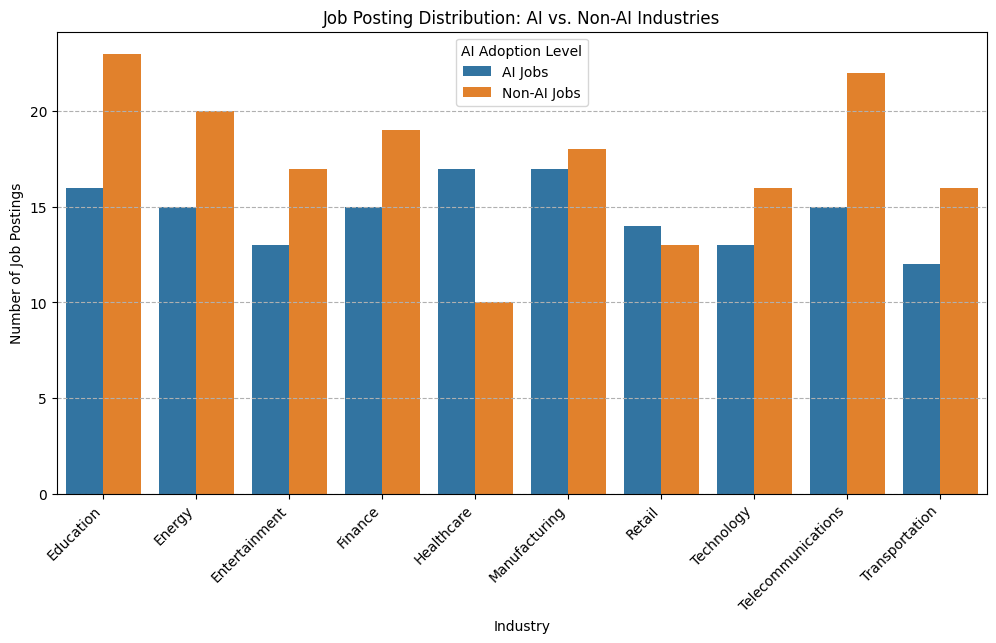

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

industry_data = pd.DataFrame({
    "Industry": common_industries,
    "AI Jobs": ai_industries.values,
    "Non-AI Jobs": non_ai_industries.values
}).melt(id_vars="Industry", var_name="AI_Adoption", value_name="Job Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_data, x="Industry", y="Job Count", hue="AI_Adoption")
plt.xticks(rotation=45, ha="right")
plt.title("Job Posting Distribution: AI vs. Non-AI Industries")
plt.xlabel("Industry")
plt.ylabel("Number of Job Postings")
plt.legend(title="AI Adoption Level")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution

We are testing to see whether the distribution of job growth projections differs significantly between AI-heavy and non-AI industries.

Null: The distribution of job growth projections is the same for AI-heavy and non-AI jobs (AI adoption does not significantly impact job growth trends)

Alternate: The job growth distribution differs between AI-heavy and non-AI jobs (AI adoption is influencing job growth to a point where it makes its distribution different from non-AI jobs)

In [111]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}
AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = stats.ks_2samp(ai_job_growth, non_ai_job_growth)

print("Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution")
print(f"K-S Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")

Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution
K-S Statistic: 0.0753, P-Value: 0.7190


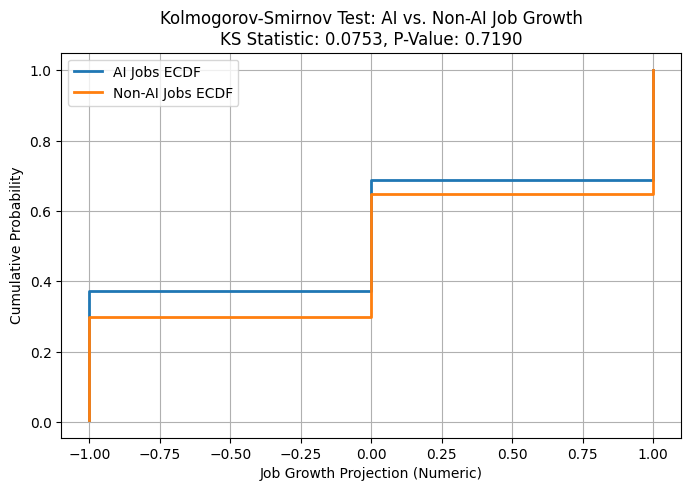

In [112]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}

AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = ks_2samp(ai_job_growth, non_ai_job_growth)

ai_sorted = np.sort(ai_job_growth)
non_ai_sorted = np.sort(non_ai_job_growth)
ai_ecdf = np.arange(1, len(ai_sorted) + 1) / len(ai_sorted)
non_ai_ecdf = np.arange(1, len(non_ai_sorted) + 1) / len(non_ai_sorted)

plt.figure(figsize=(8, 5))
plt.plot(ai_sorted, ai_ecdf, label="AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.plot(non_ai_sorted, non_ai_ecdf, label="Non-AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.xlabel("Job Growth Projection (Numeric)")
plt.ylabel("Cumulative Probability")
plt.title(f"Kolmogorov-Smirnov Test: AI vs. Non-AI Job Growth\nKS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
plt.legend()
plt.grid(True)
plt.show()